# Programmierkurs Python

## Sitzung 4 - Medien

## Bilder

Python bietet viele Möglichkeiten Bilder zu bearbeiten. Dafür werden wir die Bibliotheken `skimage`, `matplotlib` und `imageio` benutzen die auf `numpy`, eine Numerik Bibliothek für Python, basieren.

Installiert euch deshalb diese Bibliotheken indem ihr folgendes in eine *Shell* eingibt

```
pip3 install scikit-image imageio numpy matplotlib
```

## Aufbau eines digitalen Bildes

![](https://brohrer.github.io/images/image_processing/three_d_array.png)

[https://brohrer.github.io/convert_rgb_to_grayscale.html](https://brohrer.github.io/convert_rgb_to_grayscale.html)

Damit wir Bilder in Python laden können müssen wir die installierten Bibliotheken nun importieren mittels `import`, wobei `import .. as ..` die Bibliothek unter einem Synonym importiert - dies macht man um sich Schreibarbeit zu sparen.

In [1]:
# importieren der bibliotheken

import imageio
import matplotlib.pyplot as plt
import numpy as np
import skimage

# sagt jupyter das er die bilder im notebook anzeigen soll
%matplotlib inline

Ein Bild können wir nun mittels `imageio` laden - d.h. das Bild wird in RGB Werte umgewandelt - hier laden wir das bild `rsh_logo.jpg` was im selben Verzeichnis liegt in dem wir das Jupyter Notebook gestartet haben.

Diese RGB Daten können wir mit `plt.imshow` anzeigen.

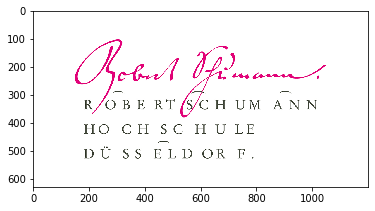

In [2]:
image = imageio.imread('rsh_logo.jpg')
plt.imshow(image);

Ein Farbbild hat 3 Dimensionen - zu einem haben wir die 2 Dimensionen auf denen das Bild sich abbildet (x, y) und die Farbdimension (z), in der die RGB Werte hinterlegt werden.

`:` ist eine *Wildcard* für alle Werte einer Dimension - in unserem Fall die Farbdimension

In [3]:
# image.shape zeigt die dimensionsgrößen des bildes an
print(f'Das Bild hat die Dimensionsgrößen {image.shape}')
print(f'RGB Werte an x=0, y=0 ist {image[0, 0, :]}')

Das Bild hat die Dimensionsgrößen (630, 1200, 3)
RGB Werte an x=0, y=0 ist [255 255 255]


Wir können diese *slicing* (siehe Sitzung 1) Schreibweise für Arrays benutzen um uns nur einen Ausschnitt des Bildes anzeigen zu lassen

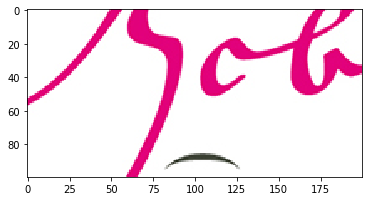

In [4]:
# zeigt alle pixel zwischen x 200 bis 400 an und y von 200 bis 300
plt.imshow(image[200:300, 200:400, :])

Wir können auch diese Schreibweise nutzen um einem bestimmten Bereich von einem Bild eine Farbe zuzuordnen

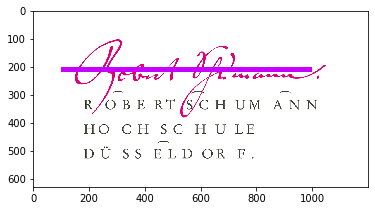

In [5]:
image[200:220, 100:1000] = [200, 0, 255]
plt.imshow(image)

Wir können auch programmatisch Muster auf dem Bild erzeugen z.B. mithilfe einer `for` Schleife

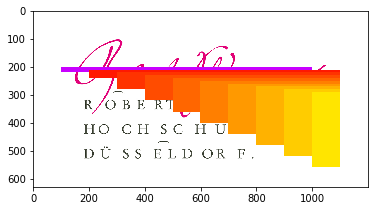

In [6]:
for i in range(10):
    image[
        200 + i * 10:200 + i*40,
        100 + i * 100: 1100,
        :
    ] = [255, 1/10* i * 255, 0]
plt.imshow(image)

Wir können dieses Bild nun mithilfe von [`imageio.imsave`](https://imageio.readthedocs.io/en/stable/userapi.html#imageio.imwrite) von RGB Daten in ein PNG Bild speichern.

In [7]:
imageio.imsave('rsh_new.png', image)

Wir können nun dieses Bild auch 100 mal laden und abspeichern als JPG um die zerstörerische Kraft der JPG Kompression zu verdeutlichen, ähnlich zu [needsmorejpeg.com](http://needsmorejpeg.com/).

Dazu müssen wir im Jupyter Notebook Ordner einen neuen Ordner erzeugen namens `rsh` was wir in der Shell mithilfe des Kommandos

```
mkdir rsh
```

erreichen.

In diesem Ordner wollen wir nun die 100 Versionen des RSH Logos abspeichern.

Mithilfe von [`imageio.help()`](https://imageio.readthedocs.io/en/stable/userapi.html#imageio.help) wissen wir aus der Dokumentation das wir die Stärke der JPEG Kompression einstellen können.

In [8]:
imageio.help('rsh.jpg')

JPEG-PIL - JPEG (ISO 10918)

    A JPEG format based on Pillow.
    
    This format supports grayscale, RGB and RGBA images.
    
    Parameters for reading
    ----------------------
    exifrotate : bool
        Automatically rotate the image according to exif flag. Default True.
    pilmode : str
        From the Pillow documentation:
        
        * 'L' (8-bit pixels, grayscale)
        * 'P' (8-bit pixels, mapped to any other mode using a color palette)
        * 'RGB' (3x8-bit pixels, true color)
        * 'RGBA' (4x8-bit pixels, true color with transparency mask)
        * 'CMYK' (4x8-bit pixels, color separation)
        * 'YCbCr' (3x8-bit pixels, color video format)
        * 'I' (32-bit signed integer pixels)
        * 'F' (32-bit floating point pixels)
        
        PIL also provides limited support for a few special modes, including
        'LA' ('L' with alpha), 'RGBX' (true color with padding) and 'RGBa'
        (true color with premultiplied alpha).
        
     

In [9]:
image = imageio.imread('rsh_new.png')

for i in range(100):
    file_name = f'rsh/rsh_{i}.jpg'
    imageio.imsave(file_name, image, quality=100-i)
    image = imageio.imread(file_name)

Das resultierende Bild ist

![](rsh_logo_99.jpg)